In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import plotly.express as px
from plotly import graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
# from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

sns.set_theme(style="dark")
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
data = pd.read_pickle('cleaned_data.pkl')

In [4]:
data.columns

Index(['my_win', 'match_id', 'barracks_status_dire', 'barracks_status_radiant',
       'cluster', 'dire_score', 'duration', 'first_blood_time', 'game_mode',
       'lobby_type', 'picks_bans', 'radiant_score', 'start_time',
       'tower_status_dire', 'tower_status_radiant', 'players', 'patch',
       'region', 'player_slot', 'hero', 'abandons', 'assists', 'backpack_0',
       'backpack_1', 'backpack_2', 'deaths', 'denies', 'gold_per_min',
       'hero_id', 'isRadiant', 'item_0', 'item_1', 'item_2', 'item_3',
       'item_4', 'item_5', 'item_neutral', 'kda', 'kills', 'kills_per_min',
       'last_hits', 'leaver_status', 'level', 'net_worth', 'total_gold',
       'total_xp', 'xp_per_min', 'id', 'base_health_regen', 'base_mana',
       'base_mana_regen', 'base_armor', 'base_attack_min', 'base_attack_max',
       'base_str', 'base_agi', 'base_int', 'str_gain', 'agi_gain', 'int_gain',
       'attack_range', 'projectile_speed', 'attack_rate', 'base_attack_time',
       'attack_point', 'move_

In [73]:
x = data[data.columns.difference(['my_win', 'match_id', 'cluster', 'picks_bans', 'start_time', 'players', 'hero', 'kda'])]

In [74]:
x.head()

,Carry,Disabler,Durable,Escape,Initiator,Nuker,Pusher,Support,abandons,agi_gain,assists,attack_point,attack_range,attack_rate,attack_type_encoded,backpack_0,backpack_1,backpack_2,barracks_status_dire,barracks_status_radiant,base_agi,base_armor,base_attack_max,base_attack_min,base_attack_time,base_health_regen,base_int,base_mana,base_mana_regen,base_str,day_vision,deaths,denies,dire_score,duration,first_blood_time,game_mode,gold_per_min,hero_id,id,int_gain,isRadiant,item_0,item_1,item_2,item_3,item_4,item_5,item_neutral,kills,kills_per_min,last_hits,leaver_status,legs,level,lobby_type,move_speed,net_worth,night_vision,patch,player_slot,primary_attr_encoded,projectile_speed,rad_dir_encoded,radiant_score,region,str_gain,total_gold,total_xp,tower_status_dire,tower_status_radiant,turn_rate,xp_per_min
0,1,1,1,0,0,0,0,0,0,3.40,1,0.50,600,1.70,1,0,0,0,3,63,22,-1.00,32,26,100,0.25,23,75,0.00,0,1800,3,4,9,1621,0,22,372,94,94,3.70,0,88,236,36,63,0,147,288.00,1,0.04,209,0,0,14,7,275,9869.00,800,52,130,0,1200,0,39,1,0.00,10050,11157,6,2047,0.60,413
1,1,0,0,1,0,1,1,0,0,3.20,5,0.50,225,1.70,0,0,0,0,51,63,26,-1.00,36,26,100,2.00,21,75,0.00,19,1800,5,7,15,1764,17,22,393,12,12,2.00,0,174,75,63,61,36,147,331.00,1,0.03,168,0,2,16,7,290,10968.00,800,52,129,0,900,0,43,1,2.20,11554,14494,388,1975,0.60,493
2,1,0,1,1,0,0,0,0,0,2.10,10,0.30,150,1.70,0,0,0,4204,3,63,25,1.00,27,23,90,2.00,16,75,0.00,23,1800,4,9,42,3274,24,22,593,67,67,1.70,0,137,208,40,160,63,147,362.00,15,0.27,396,0,0,27,7,290,29983.00,800,52,129,0,900,0,43,1,2.50,32358,44199,4,1572,0.60,810
3,0,1,0,0,0,1,0,0,0,1.30,2,0.50,700,1.70,1,0,0,0,63,0,14,3.00,14,12,100,0.25,25,75,1.00,19,1800,9,2,38,1739,138,22,205,105,105,3.00,1,0,60,0,0,0,180,675.00,2,0.07,51,0,6,11,7,300,5269.00,800,52,0,1,900,1,10,1,2.50,5941,7361,1983,0,0.60,254
4,1,0,1,1,0,0,0,0,0,2.10,27,0.30,150,1.70,0,0,0,0,3,15,25,1.00,27,23,90,2.00,16,75,0.00,23,1800,11,11,68,3743,65,22,614,67,67,1.70,0,160,208,137,127,63,147,309.00,11,0.18,388,0,0,29,7,290,30477.00,800,52,129,0,900,0,80,1,2.50,38303,46350,6,32,0.60,743


In [75]:
x.shape

(5382, 73)

In [76]:
y = data.my_win

In [77]:
y.shape

(5382,)

In [78]:
ss = StandardScaler()
xs = ss.fit_transform(x)

In [79]:
x_train, x_test, y_train, y_test = train_test_split(xs, y, test_size = 0.3, random_state=42)

In [80]:
cv = KFold(n_splits=10, shuffle=True, random_state=20)

In [81]:
pca = PCA()
pca.fit(x_train)
Xpca = pca.transform(x_train)

In [82]:
# Plotting principal components explained to determine number of features to use
# fig, ax = plt.subplots(figsize=(10,10))
# ax.plot(range(1,122), pca.explained_variance_ratio_)
# ax.scatter(range(1, 121), pca.explained_variance_ratio_)
# ax.set_title('explained variance of components')
# ax.set_xlabel('principal component')
# ax.set_ylabel('explained variance')

In [83]:
# Training using only standardized features on a KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [84]:
print(cross_val_score(knn, x_train, y_train, cv=cv))
print(cross_val_score(knn, x_train, y_train, cv=cv).mean())

[0.87533156 0.88328912 0.89920424 0.89124668 0.9071618  0.87267905
 0.90185676 0.91223404 0.89893617 0.88829787]
0.8930237315875613


In [85]:
sgd_cls_params = {
    'loss':['log_loss'],
    'penalty':['l1','l2'],
    'alpha':np.logspace(-5,2,50)
}

sgd_cls = SGDClassifier()
sgd_cls_gs = GridSearchCV(sgd_cls, sgd_cls_params, cv=cv, verbose=1)

In [86]:
sgd_cls_gs.fit(x_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=20, shuffle=True),
             estimator=SGDClassifier(),
             param_grid={'alpha': array([1.00000000e-05, 1.38949549e-05, 1.93069773e-05, 2.68269580e-05,
       3.72759372e-05, 5.17947468e-05, 7.19685673e-05, 1.00000000e-04,
       1.38949549e-04, 1.93069773e-04, 2.68269580e-04, 3.72759372e-04,
       5.17947468e-04, 7.19685673e-04, 1.00000000e-03, 1.389495...
       1.00000000e-01, 1.38949549e-01, 1.93069773e-01, 2.68269580e-01,
       3.72759372e-01, 5.17947468e-01, 7.19685673e-01, 1.00000000e+00,
       1.38949549e+00, 1.93069773e+00, 2.68269580e+00, 3.72759372e+00,
       5.17947468e+00, 7.19685673e+00, 1.00000000e+01, 1.38949549e+01,
       1.93069773e+01, 2.68269580e+01, 3.72759372e+01, 5.17947468e+01,
       7.19685673e+01, 1.00000000e+02]),
                         'loss': ['log_loss'], 'penalty': ['l1', 'l2']},
             verbose=1)

In [87]:
print(sgd_cls_gs.best_params_)
print(sgd_cls_gs.best_score_)

{'alpha': 0.001, 'loss': 'log_loss', 'penalty': 'l1'}
0.8863874936508832


In [88]:
clf = DecisionTreeClassifier(max_depth =None)
clf.fit(x_train, y_train)


DecisionTreeClassifier()

In [89]:
print(cross_val_score(clf, x_train, y_train, cv=cv))
print(cross_val_score(clf, x_train, y_train, cv=cv).mean())

[0.79310345 0.80636605 0.78779841 0.73740053 0.78514589 0.80636605
 0.77718833 0.78191489 0.78723404 0.77925532]
0.7817850894520006


In [90]:
bdt = BaggingClassifier(DecisionTreeClassifier())
bdt.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [91]:
print(cross_val_score(bdt, x_train, y_train, cv=cv))
print(cross_val_score(bdt, x_train, y_train, cv=cv).mean())

[0.83554377 0.84615385 0.86206897 0.79840849 0.84615385 0.86206897
 0.83023873 0.85904255 0.86968085 0.83510638]
0.8524112534567413


In [92]:
rf = RandomForestClassifier(n_estimators=10, n_jobs=-1)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1)

In [93]:
print(cross_val_score(rf, x_train, y_train, cv=cv))
print(cross_val_score(rf, x_train, y_train, cv=cv).mean())

[0.83289125 0.85676393 0.8806366  0.84615385 0.89124668 0.89124668
 0.83819629 0.88829787 0.92021277 0.92021277]
0.876833483830916


In [94]:
etc = ExtraTreesClassifier(n_jobs=-1)
etc.fit(x_train, y_train)

ExtraTreesClassifier(n_jobs=-1)

In [95]:
print(cross_val_score(etc, x_train, y_train, cv=cv))
print(cross_val_score(etc, x_train, y_train, cv=cv).mean())

[0.97877984 0.97877984 0.99204244 0.98408488 1.         0.97612732
 0.98938992 0.99202128 0.98404255 0.98670213]
0.9883204469778203


In [96]:
cross_val_score(knn, x_test, y_test, cv=cv).mean()

0.8049459397285483

In [97]:
cross_val_score(sgd_cls_gs, x_test, y_test, cv=cv).mean()

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


0.8693543439920252

In [98]:
cross_val_score(clf, x_test, y_test, cv=cv).mean()

0.759799861973775

In [99]:
cross_val_score(bdt, x_test, y_test, cv=cv).mean()

0.8273023541139481

In [100]:
cross_val_score(rf, x_test, y_test, cv=cv).mean()

0.8514147688060731

In [101]:
cross_val_score(etc, x_test, y_test, cv=cv).mean()

0.9758645809370448

In [102]:
predictC = knn.predict(x_test)
probaC = knn.predict_proba(x_test)

In [103]:
predicte = etc.predict(x_test)
probae = etc.predict_proba(x_test)

In [104]:
# TP FN
# FP TN
confusion_matrix(y_test, predictC)

array([[760,  69],
       [105, 681]])

In [105]:
# TP FN
# FP TN
confusion_matrix(y_test, predicte)

array([[822,   7],
       [ 15, 771]])

In [106]:
print(accuracy_score(y_test, predictC))

0.8922600619195047


In [107]:
print(recall_score(y_test, predictC))

0.8664122137404581


In [108]:
print(classification_report(y_test, predictC))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       829
           1       0.91      0.87      0.89       786

    accuracy                           0.89      1615
   macro avg       0.89      0.89      0.89      1615
weighted avg       0.89      0.89      0.89      1615



In [109]:
print(classification_report(y_test, predicte))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       829
           1       0.99      0.98      0.99       786

    accuracy                           0.99      1615
   macro avg       0.99      0.99      0.99      1615
weighted avg       0.99      0.99      0.99      1615



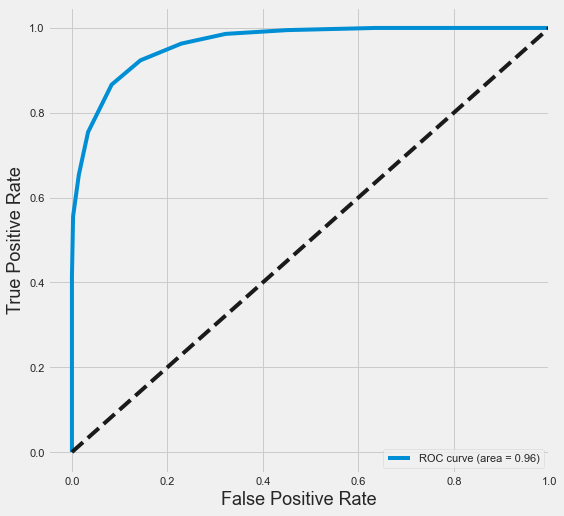

In [110]:
fpr, tpr, _ = roc_curve(y_test, probaC[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
# plt.title('Receiver operating characteristic for cancer detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

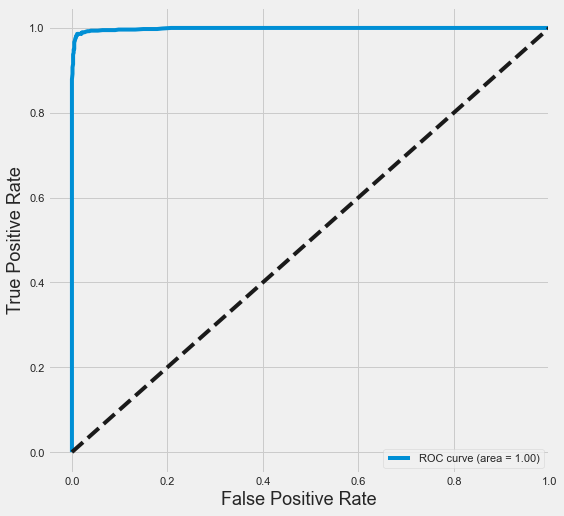

In [111]:
# Data leakage much 

fpr, tpr, _ = roc_curve(y_test, probae[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
# plt.title('Receiver operating characteristic for cancer detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()